Approach to the prediction
1.import all libaray
2.Load and audit the data 
3.Data prepration and Data Transformation
    1.missing value
    2.Inconsistent value:Replace all transformation with consistent values 
    3.outliers
4.Data visualization
5.Data analysis
    1.Uni-variate Analysis(Mean,Median,Mode,Skewness)
    2.Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
    3.Multi-Variate Analysis
        1.Regression:Not a regressiion 
        2.Classification
            1.Apply Logistic Regression
            2.Apply Decision Tree
            3.Evalaute Between Logistic and Decision Tre Which is the better model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### 2.Load and audit the data 


In [3]:
test=pd.read_csv('D:\\Google Drive\\imarticus python\Arul Sir\\test_lAUu6dG.csv')
test



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
train=pd.read_csv('D:\\Google Drive\\imarticus python\\Arul Sir\\train_ctrUa4K.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.skew()

C:\Users\samee\AppData\Local\Temp\ipykernel_22760\3574648760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

DISTRIBUTION

<AxesSubplot:>

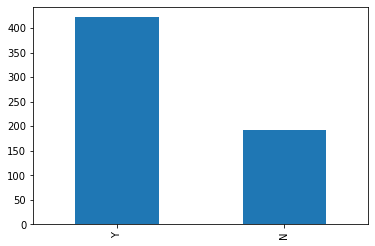

In [9]:
train['Loan_Status'].value_counts().plot(kind='bar')

<AxesSubplot:>

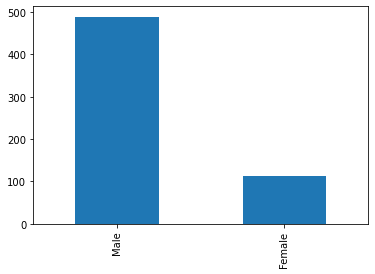

In [10]:
train['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

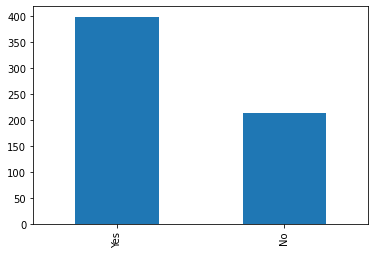

In [11]:
train['Married'].value_counts().plot(kind='bar')

<AxesSubplot:>

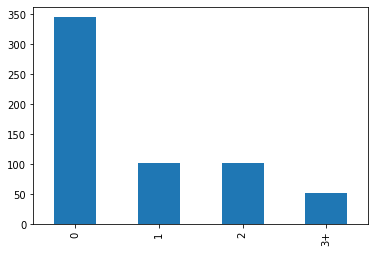

In [12]:
train['Dependents'].value_counts().plot(kind='bar')

<AxesSubplot:>

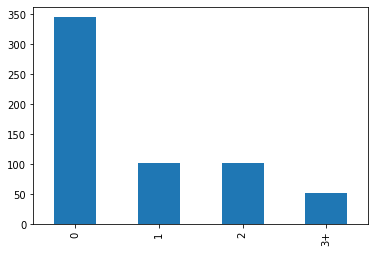

In [13]:
train['Dependents'].value_counts().plot(kind='bar')

<AxesSubplot:>

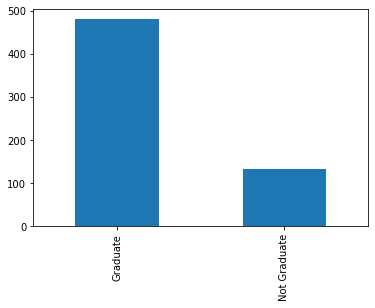

In [14]:
train['Education'].value_counts().plot(kind='bar')

<AxesSubplot:>

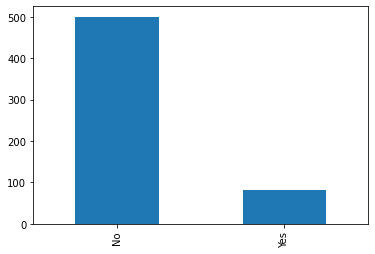

In [15]:
train['Self_Employed'].value_counts().plot(kind='bar')

<AxesSubplot:>

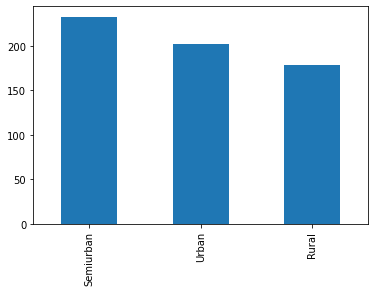

In [16]:
train['Property_Area'].value_counts().plot(kind='bar')

<AxesSubplot:>

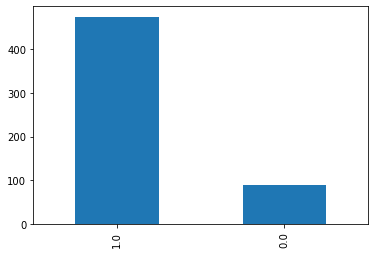

In [17]:
train['Credit_History'].value_counts().plot(kind='bar')

### 3.Data prepration and Data Transformation


In [18]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 

In [19]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
def data_prep(data):
    # filling Null values for all categorical
    data['Gender']=np.where(data['Gender'].isna(),data['Gender'].mode(dropna='True'),data['Gender'])
    data['Married']=np.where(data['Married'].isna(),data['Married'].mode(dropna='True'),data['Married'])
    data['Dependents'].replace('3+',3,inplace=True)
    data['Dependents']=np.where(data['Dependents'].isna(),data['Dependents'].mode(dropna='True'),data['Dependents'])
    data['Dependents']=data['Dependents'].astype('int64')
    data['Education']=np.where(data['Education'].isna(),data['Education'].mode(dropna='True'),data['Education'])
    data['Self_Employed']=np.where(data['Self_Employed'].isna(),data['Self_Employed'].mode(dropna='True'),data['Self_Employed'])
    data['Credit_History']=np.where(data['Credit_History'].isna(),data['Credit_History'].mode(dropna='True'),data['Credit_History'])
    
    #filling NULL values for all numeric 

    for i in data.columns:
        if data[i].dtype=='float':
            data[i]=np.where(data[i].isna(),data[i].median(skipna=True),data[i])
    return data


In [21]:
data_prep(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
# DROP lOAD_ID
train.drop(['Loan_ID'],axis=1,inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


### ENCODE THE VARIABLES

In [24]:
def encode(data):
    le=LabelEncoder()
    for i in data.columns:
        if data[i].dtype=='object':
            data[i]=le.fit_transform(data[i])
    return data

In [25]:
encode(train)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB


<AxesSubplot:>

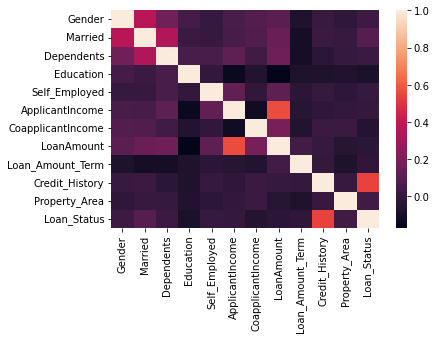

In [27]:
sns.heatmap(train.corr())
# THIS IS FOR CONTINOUS 

In [28]:
# FOR CATEGORIES
from scipy.stats import chi2_contingency
def chi_sq(var1,var2):
    #check for categorical variable Relationshiop
    table=pd.crosstab(var1,var2)
    _,p,_,_=chi2_contingency(table)
    if p<=0.05:
        print('Accept the alternate hypothesis',round(p,2))
    else:
        print('failed to reject the null hypoyhesis',round(p,2))
    return table


### .NULL Hypothesis: Gender and Loan Status are Independet
### .Alternate hypothesis:Gender and Loan Status are dependent

## P_value =sampling errror

In [29]:
chi_sq(train['Gender'],train['Loan_Status'])


failed to reject the null hypoyhesis 0.74


Loan_Status,0,1
Gender,,
0,37,75
1,155,347


In [30]:
chi_sq(train['Education'],train['Loan_Status'])

Accept the alternate hypothesis 0.04


Loan_Status,0,1
Education,,
0,140,340
1,52,82


In [31]:
chi_sq(train['Credit_History'],train['Loan_Status'])

Accept the alternate hypothesis 0.0


Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,110,415


In [32]:
# sns.pairplot(train)

SPLIT TRAIN DATA INTO TRAIN AND TEST

In [33]:
x=train.drop(['Loan_Status'],axis=1)
y=train['Loan_Status']

In [34]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [35]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [36]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=123)

In [38]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [39]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
preds_ytrain_lgr=lgr.predict(xtrain)
preds_ytest_lgr=lgr.predict(xtest)

In [40]:
# print(ytrain)

In [41]:
# preds_ytrain_lgr

In [42]:
# function for all 
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

In [43]:
acc_report(ytrain,preds_ytrain_lgr)

the accuracy of tha model is  0.8167006109979633
[[ 65  85]
 [  5 336]]
              precision    recall  f1-score   support

           0       0.93      0.43      0.59       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491



In [44]:
acc_report(ytest,preds_ytest_lgr)

the accuracy of tha model is  0.7804878048780488
[[17 25]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



## DECIOSION TREE IMPLEMENTATION

In [45]:
dtree=DecisionTreeClassifier(max_depth=5,min_samples_split=5)
dtree.fit(xtrain,ytrain)
preds_dtree_train=dtree.predict(xtrain)
preds_dtree_test=dtree.predict(xtest)

In [46]:
acc_report(ytrain,preds_dtree_train)

the accuracy of tha model is  0.8431771894093686
[[ 88  62]
 [ 15 326]]
              precision    recall  f1-score   support

           0       0.85      0.59      0.70       150
           1       0.84      0.96      0.89       341

    accuracy                           0.84       491
   macro avg       0.85      0.77      0.80       491
weighted avg       0.84      0.84      0.83       491



In [47]:
acc_report(ytest,preds_dtree_test)

the accuracy of tha model is  0.7154471544715447
[[18 24]
 [11 70]]
              precision    recall  f1-score   support

           0       0.62      0.43      0.51        42
           1       0.74      0.86      0.80        81

    accuracy                           0.72       123
   macro avg       0.68      0.65      0.65       123
weighted avg       0.70      0.72      0.70       123



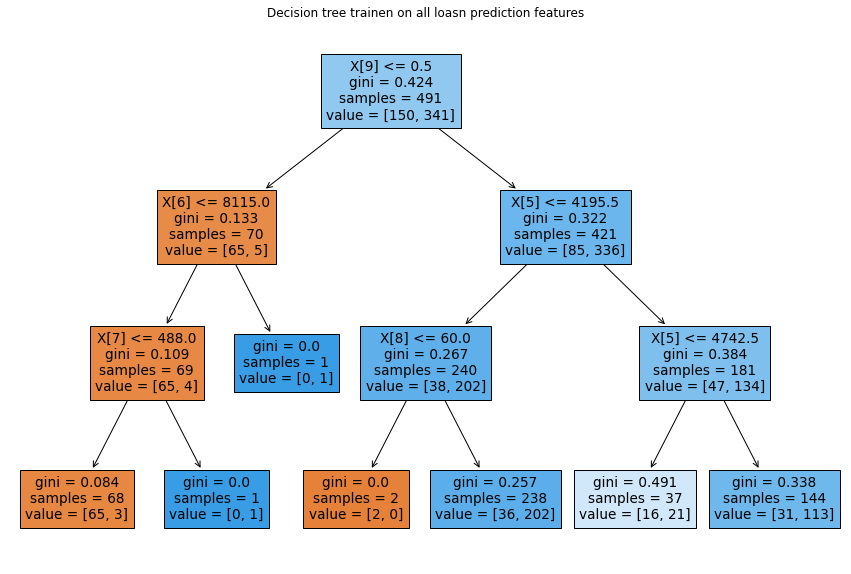

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=[15,10])
clf=DecisionTreeClassifier(max_depth=3).fit(xtrain,ytrain)
plot_tree(clf,filled=True)
plt.title('Decision tree trainen on all loasn prediction features')
plt.show()

## RANDOM FOREST CLASSIFICATION

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf=RandomForestClassifier(n_estimators=20,max_depth=3,verbose=1)
rf.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestClassifier(max_depth=3, n_estimators=20, verbose=1)

In [51]:
pred_rf_train=rf.predict(xtrain)
pred_rf_test=rf.predict(xtest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [52]:
acc_report(ytrain,pred_rf_train)

the accuracy of tha model is  0.8187372708757638
[[ 65  85]
 [  4 337]]
              precision    recall  f1-score   support

           0       0.94      0.43      0.59       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.87      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491



In [53]:
acc_report(ytest,pred_rf_test)

the accuracy of tha model is  0.7804878048780488
[[17 25]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



# TEST DATASET

In [60]:
# CHECKING WITH NULL VALUES
data_prep(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [61]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [66]:
encode(test)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [64]:
test.drop(['Loan_ID'],axis=1,inplace=True)

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int32  
 1   Married            367 non-null    int32  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int32  
 4   Self_Employed      367 non-null    int32  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 24.5 KB


In [69]:
pred_test_LGR=lgr.predict(test)
pred_test_LGR

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [70]:
pred_test_DEC=dtree.predict(test)
pred_test_DEC

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [72]:
pred_test_rf=rf.predict(test)
pred_test_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,